In [20]:
from diags import Conventional
import numpy as np
import pandas as pd
from filter_df import filter_df
from make_da_plots import make_base_plots, make_wind_base_plots
import time_series as time_series
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt

In [21]:
pd.set_option('display.max_columns', None) # so I can see all columns on the df

# Filter dataframe returned by PyGSI

## Read diag files

In [22]:
#temperature diag files
diag_t_ges_fp = '../example_data/diag_conv_t_ges.2024031812.nc4'
diag_t_anl_fp = '../example_data/diag_conv_t_anl.2024031812.nc4'

#wind diag files
diag_uv_ges_fp = '../example_data/diag_conv_uv_ges.2024031812.nc4'
diag_uv_anl_fp = '../example_data/diag_conv_uv_anl.2024031812.nc4'

In [23]:
#Temperature Diag file
diag_t_ges = Conventional(diag_t_ges_fp)
diag_t_anl = Conventional(diag_t_anl_fp)

#Wind Diag file
diag_uv_ges = Conventional(diag_uv_ges_fp)
diag_uv_anl = Conventional(diag_uv_anl_fp)

## Query data

In [24]:
df_t_ges = diag_t_ges.get_data()
df_t_anl = diag_t_anl.get_data()

df_uv_ges = diag_uv_ges.get_data()
df_uv_anl = diag_uv_anl.get_data()

In [25]:
df_t_anl['station_id'][0]

'NLOYR3BA'

In [26]:
# for col in df_t_anl.columns:
#     # Check if all elements in the column are equal between _anl and _ges
#     if not (df_anl[col] == df_ges[col]).all():
#         print(f"Column '{col}' is different.")

## Testing PyGSI filter_obs function

### Set filter arguments

In [27]:
elv_range = (0,20)
p_range = (500,1000)
err_range = (0, 4)
station_ids = ['NLOYR3BA']

# Lat and lon ranges for colorado
co_lats = (37, 41)
co_lons = (360-109, 360-102) #to convert from deg west to deg east

In [28]:
#testing station_id filter
# df_anl_fil = filter_df(df_anl, station_ids=station_ids)
# df_ges_fil = filter_df(df_ges, station_ids=station_ids)

In [29]:
# temp examples
# fil_t_dfs = filter_df([df_t_anl, df_t_ges], obs_types= [187], hem='CONUS')
fil_t_dfs = filter_df([df_t_anl, df_t_ges], obs_types= [187], lat_range=co_lats,
                       lon_range=co_lons)

df_t_anl_fil = fil_t_dfs[0]
df_t_ges_fil = fil_t_dfs[1]
print(len(df_t_anl_fil))
print(len(df_t_ges_fil))

89
89


In [30]:
# wind examples
# fil_uv_dfs = filter_df([df_uv_anl, df_uv_ges], obs_types= [287], hem='CONUS')
fil_uv_dfs = filter_df([df_uv_anl, df_uv_ges], obs_types= [287], lat_range=co_lats, lon_range=co_lons)

df_uv_anl_fil = fil_uv_dfs[0]
df_uv_ges_fil = fil_uv_dfs[1]
print(len(df_uv_anl_fil))
print(len(df_uv_ges_fil))

91
91


## Testing base plots

In [31]:
# diag_ges.metadata

In [32]:
# date = diag_ges.metadata['Date']
# date_str = date.strftime('%Y%m%d%H')
# date_str

### Testing non wind

In [36]:
make_base_plots(df_t_anl_fil, df_t_ges_fil, diag_t_ges.metadata, save_plots=True)

------------ Temperature Data Assimilation Statistics and Plots ------------


Observation Type: 187

Proportion Assimilated: 0.6629213690757751

Obs Statistics: 
n: 89, mean: -415.8681945800781, std: 10.272726058959961, max: -396.5157470703125, min: -440.40655517578125

OmF Statistics: 
n: 89, mean: -1.0169750452041626, std: 6.726416110992432, max: 24.4896183013916, min: -16.149961471557617

OmA Statistics: 
n: 89, mean: 0.7783920764923096, std: 3.9553911685943604, max: 24.894996643066406, min: -6.024988651275635



------------ Temperature Data Assimilation Statistics and Plots ------------


Observation Type: 187

Proportion Assimilated: 0.6629213690757751

Obs Statistics: 
n: 89, mean: 24.33432960510254, std: 5.707066535949707, max: 35.08567428588867, min: 10.701904296875

OmF Statistics: 
n: 89, mean: -0.5649861693382263, std: 3.7368974685668945, max: 13.60534381866455, min: -8.972201347351074

OmA Statistics: 
n: 89, mean: 0.43243998289108276, std: 2.197439670562744, max: 13.830554008483887, min: -3.3472158908843994



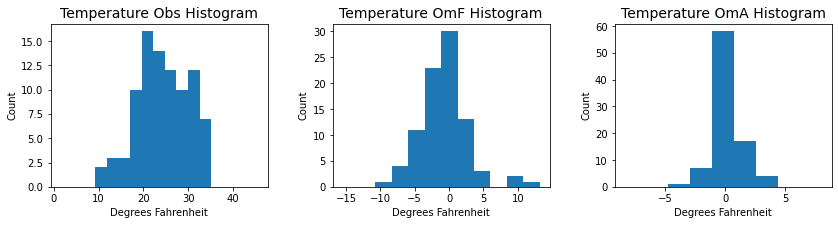

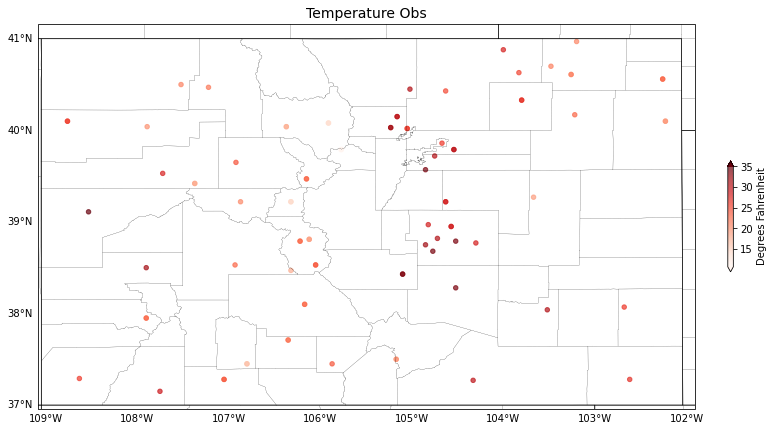

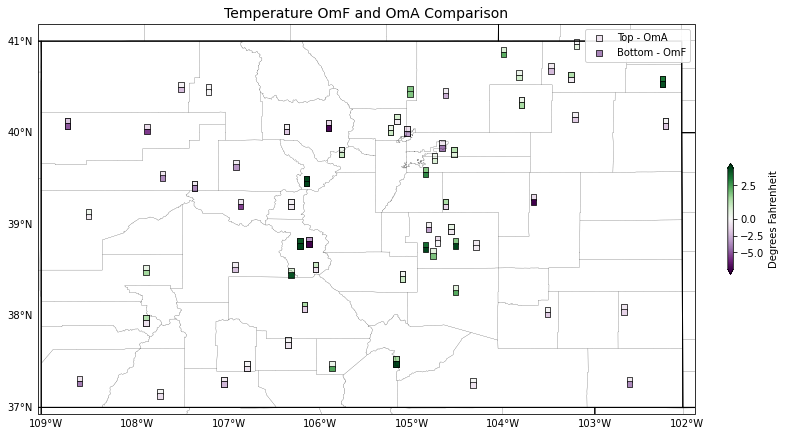

In [34]:
make_base_plots(df_t_anl_fil, df_t_ges_fil, diag_t_ges.metadata)

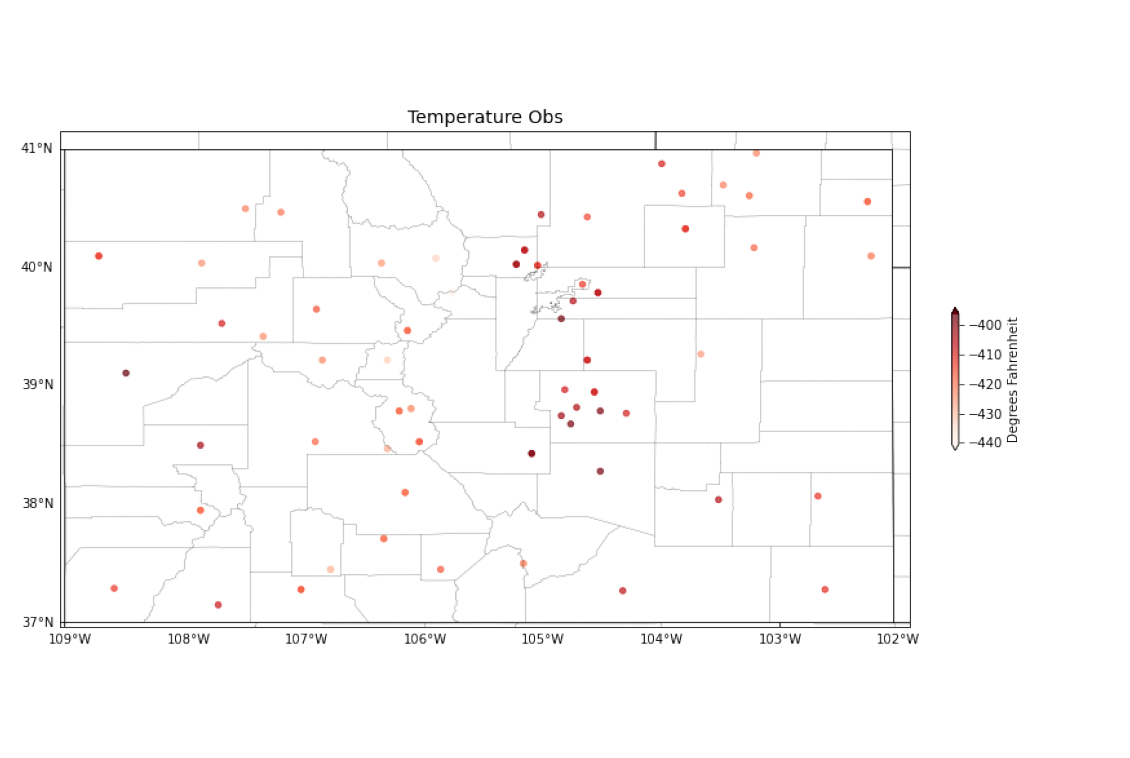

In [37]:
map_img = plt.imread('t_2024031812_plots/Temperature_obs_map.png')
plt.figure(figsize = (20,15))
plt.imshow(map_img)
plt.axis('off')
plt.show()

### Testing wind

In [38]:
make_wind_base_plots(df_uv_anl_fil, df_uv_ges_fil, diag_uv_ges.metadata, save_plots=True)

------------ Wind Data Assimilation Statistics and Plots ------------


Observation Type: 287

Proportion Assimilated: 0.791208803653717

U Obs Statistics: 
n: 91, mean: 1.145054578781128, std: 2.0907578468322754, max: 7.099999904632568, min: -3.5

U OmF Statistics: 
n: 91, mean: 0.37752583622932434, std: 1.8200116157531738, max: 4.478912830352783, min: -2.440760850906372

U OmA Statistics: 
n: 91, mean: 0.0741645023226738, std: 0.5001339316368103, max: 1.508601427078247, min: -1.9756585359573364

V Obs Statistics: 
n: 91, mean: -0.07142855226993561, std: 1.6294864416122437, max: 3.799999952316284, min: -4.099999904632568

V OmF Statistics: 
n: 91, mean: 0.0022607871796935797, std: 1.4278274774551392, max: 4.583501815795898, min: -2.4814577102661133

V OmA Statistics: 
n: 91, mean: -0.01565796695649624, std: 0.4116342067718506, max: 1.6907378435134888, min: -1.6363645792007446

Wind Speed Obs Statistics: 
n: 91, mean: 2.187013864517212, std: 1.8867207765579224, max: 8.198780059814453, 

------------ Wind Data Assimilation Statistics and Plots ------------


Observation Type: 287

Proportion Assimilated: 0.791208803653717

U Obs Statistics: 
n: 91, mean: 1.145054578781128, std: 2.0907578468322754, max: 7.099999904632568, min: -3.5

U OmF Statistics: 
n: 91, mean: 0.37752583622932434, std: 1.8200116157531738, max: 4.478912830352783, min: -2.440760850906372

U OmA Statistics: 
n: 91, mean: 0.0741645023226738, std: 0.5001339316368103, max: 1.508601427078247, min: -1.9756585359573364

V Obs Statistics: 
n: 91, mean: -0.07142855226993561, std: 1.6294864416122437, max: 3.799999952316284, min: -4.099999904632568

V OmF Statistics: 
n: 91, mean: 0.0022607871796935797, std: 1.4278274774551392, max: 4.583501815795898, min: -2.4814577102661133

V OmA Statistics: 
n: 91, mean: -0.01565796695649624, std: 0.4116342067718506, max: 1.6907378435134888, min: -1.6363645792007446

Wind Speed Obs Statistics: 
n: 91, mean: 2.187013864517212, std: 1.8867207765579224, max: 8.198780059814453, 

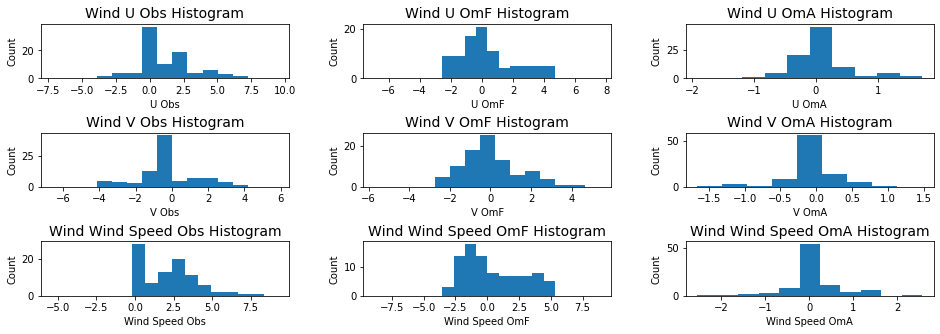

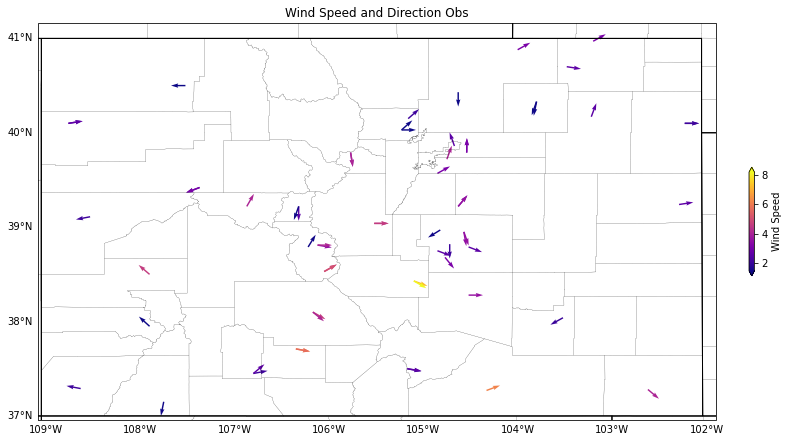

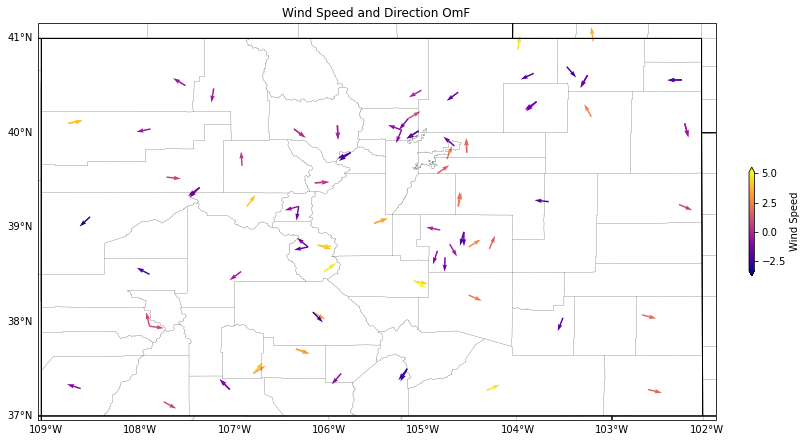

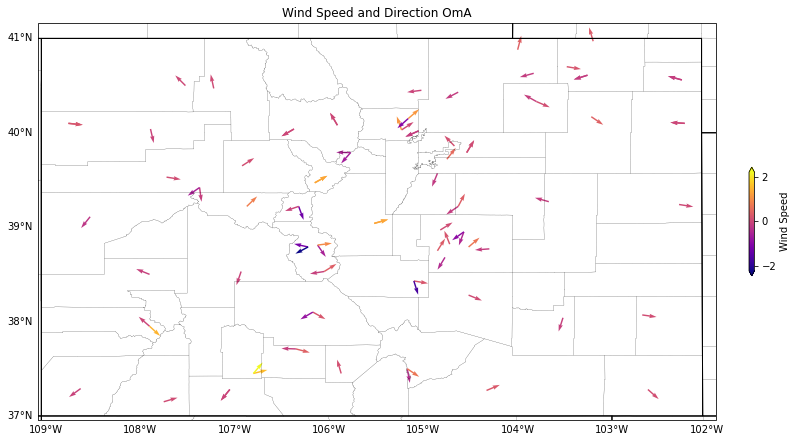

In [39]:
make_wind_base_plots(df_uv_anl_fil, df_uv_ges_fil, diag_uv_ges.metadata)

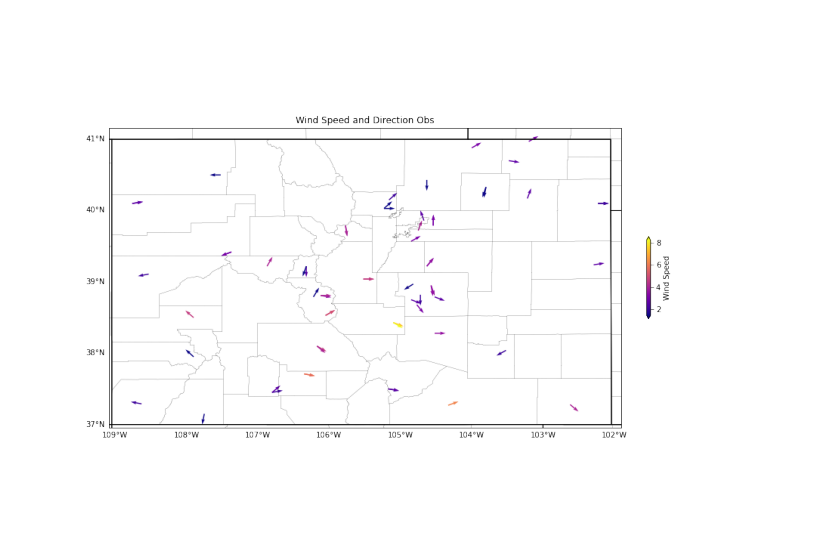

In [41]:
map_img = plt.imread('wind_2024031812_plots/wind_speed_direction_Obs_map.png')
plt.figure(figsize = (15,10))
plt.imshow(map_img)
plt.axis('off')
plt.show()

# Exploring time series plots

In [42]:
# Get the yesterdays date
today = datetime.today()
yesteryesterday = today - timedelta(days=1)

# Format date
date = yesteryesterday.strftime('%Y%m%d')
print(date)

20240710


In [43]:
rrfs_data_fp = "/lfs4/BMC/nrtrr/NCO_dirs/v0.8.8/com/prod/"
rtma_data_fp = "/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS." + date

## Dataframe for reference

In [44]:
# test_hr = '20'
# test_fp = f"{rtma_data_fp}/{test_hr}/diag_conv_t_anl.{date}{test_hr}.nc4.gz"
# test_df = Conventional(test_fp).get_data()

In [45]:
# station_ids = ['G4CUISJA']
station_ids = None
obs_types = None
path = '/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod'

# Get a list of strings with all hours of day
var = 't'

# Get the current date and time in UTC
now_utc = datetime.now(timezone.utc)
f_time = now_utc.replace(minute=0, second=0, microsecond=0)
s_time = f_time - timedelta(days=2)
s_time = s_time.replace(hour=0)

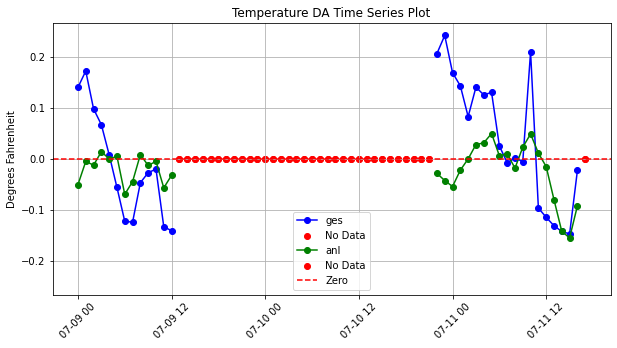

In [46]:
time_series.plot_time_series(path, var, anl_ges='both', s_time=s_time, f_time=f_time)